## Breast Cancer

In [1]:
##############################################################################################
#                                   Import Libraries
##############################################################################################
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import binary_crossentropy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.optimizers import adam, rmsprop
from keras import initializers
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [2]:
##############################################################################################
#                                   Load Dataset
##############################################################################################
Cancer = pd.read_csv(r"C:\Users\Ramatu's PC\Desktop\430pm\Cancerdata.csv")

In [3]:
##############################################################################################
#                                    Dataset Cleaning
##############################################################################################
# drop the ID column
Cancer.drop(['id'], axis=1, inplace = True)

#strip() takes out leading and trailing spaces
Cancer.columns.str.strip()

#View the first five rows
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
##############################################################################################
#                       Split the dataset into input (X) and output (Y)
##############################################################################################
X = Cancer.drop('diagnosis',axis=1)
Y = Cancer['diagnosis']

In [5]:
##############################################################################################
#                         Encode Class value as integer
##############################################################################################
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


In [7]:
# baseline model

def create_baseline():
        # Create a Sequential model and add layers one at a time until the desired network topology is 
    #achieved
    model = Sequential()

    # Create the first layer. check that the input layer has the right number of dimension by using
    # input_dim argument and setting it to 30 for the 30 input variables
    model.add(Dense(34, input_dim = 30, kernel_initializer ='uniform', activation = 'relu'))
    # The first hidden layer has 34 neurons and expects 30 input variables
    # The initialization method is uniform --- The network weights is initialized to a small random
    #number generated from the uniform distribution --- Keras default (0 and 0.05)
    # The activation function for the first layer is relu

    # Create second Layer
    model.add(Dense(30, kernel_initializer ='uniform', activation = 'relu'))

    # Create third Layer
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Sigmoid activation function --- to ensure that the network output is between 0 and 1
    #the final layer predicts class --- Malignant, or Benign
    

    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# evaluate model with standardized dataset
estimator_B = KerasClassifier(build_fn=create_baseline, nb_epoch=150, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS = cross_val_score(estimator_B, X_train, y_train, cv=kfold)
results_VS = cross_val_score(estimator_B, X_test, y_test, cv=kfold)
print("Baseline Train set: %.2f%% (%.2f%%)" % (results_TS.mean()*100, results_TS.std()*100))
print("Baseline Test set: %.2f%% (%.2f%%)" % (results_VS.mean()*100, results_VS.std()*100))

Baseline Train set: 77.37% (12.94%)
Baseline Test set: 64.93% (18.73%)


In [8]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
estimator_B.fit(X_train, y_train)

y_pred_B = estimator_B.predict(X_test)
scores = cross_val_score(estimator_B, X_test, y_test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_B, y_test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred_B))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_test,y_pred_B))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_test = y_test.ravel() 
y_pred_B= y_pred_B.ravel() 

print('Misclassified examples: %d' % (y_test != y_pred_B).sum())
print('Misclassification rate: %.3f' % ((y_test != y_pred_B).sum()/y_pred_B.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(estimator_B.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(estimator_B.score(X_train, y_train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.427

KerasClassifier Confusion Matrix:

[[10 98]
 [ 0 63]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.09      0.17       108
           1       0.39      1.00      0.56        63

    accuracy                           0.43       171
   macro avg       0.70      0.55      0.37       171
weighted avg       0.78      0.43      0.31       171

Mean ROC AUC: 0.748

Misclassified examples: 98
Misclassification rate: 0.609 %
Test set Accuracy: 0.427
Training set Accuracy: 0.445
--------------- KerasClassifier: classifier.fit [Done]


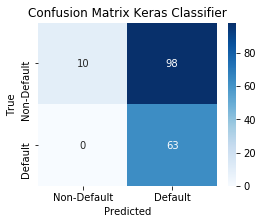

In [9]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test, y_pred_B)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

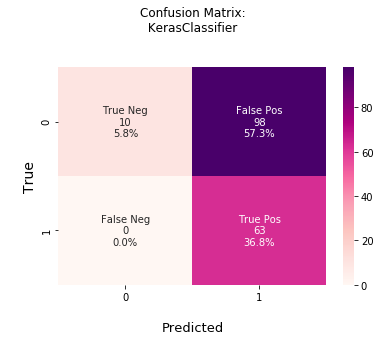

In [10]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

In [14]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, nb_epoch=150,
batch_size=10, verbose=0)))
pipeline_ST = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS2 = cross_val_score(pipeline_ST, X_train, y_train, cv=kfold)
results_VS2 = cross_val_score(pipeline_ST, X_test, y_test, cv=kfold)
print("Standardized Train set: %.2f%% (%.2f%%)" % (results_TS2.mean()*100, results_TS2.std()*100))
print("Standardized Test set: %.2f%% (%.2f%%)" % (results_VS2.mean()*100, results_TS2.std()*100))

Standardized Train set: 93.96% (3.96%)
Standardized Test set: 85.33% (3.96%)


In [15]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
pipeline_ST.fit(X_train, y_train)

y_pred_ST = pipeline_ST.predict(X_test)
scores_ST = cross_val_score(pipeline_ST, X_test, y_test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_ST, y_test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred_ST))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_test,y_pred_ST))
print('Mean ROC AUC: %.3f' % scores_ST.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_test = y_test.ravel() 
y_pred_ST= y_pred_ST.ravel() 

print('Misclassified examples: %d' % (y_test != y_pred_ST).sum())
print('Misclassification rate: %.3f' % ((y_test != y_pred_ST).sum()/y_pred_ST.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(pipeline_ST.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(pipeline_ST.score(X_train, y_train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.930

KerasClassifier Confusion Matrix:

[[102   6]
 [  6  57]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.90      0.90        63

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Mean ROC AUC: 0.978

Misclassified examples: 12
Misclassification rate: 0.190 %
Test set Accuracy: 0.930
Training set Accuracy: 0.937
--------------- KerasClassifier: classifier.fit [Done]


power of standardization

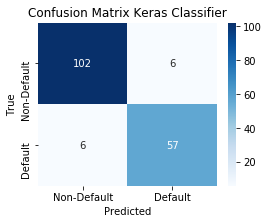

In [17]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test, y_pred_ST)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

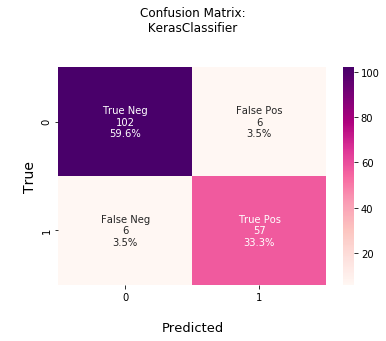

In [18]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

In [19]:
##############################################################################################
#                       Define The Neural Network Model
##############################################################################################


def create_model(optimizer= 'rmsprop' , kernel_initializer= 'glorot_uniform' ):
    
    # Create a Sequential model and add layers one at a time until the desired network topology is 
    #achieved
    model = Sequential()

    # Create the first layer. check that the input layer has the right number of dimension by using
    # input_dim argument and setting it to 30 for the 30 input variables
    model.add(Dense(34, input_dim = 30, kernel_initializer ='uniform', activation = 'relu'))
    # The first hidden layer has 34 neurons and expects 30 input variables
    # The initialization method is uniform --- The network weights is initialized to a small random
    #number generated from the uniform distribution --- Keras default (0 and 0.05)
    # The activation function for the first layer is relu

    # Create second Layer
    model.add(Dense(30, kernel_initializer ='uniform', activation = 'relu'))

    # Create third Layer
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Sigmoid activation function --- to ensure that the network output is between 0 and 1
    #the final layer predicts class --- Malignant, or Benign

    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= optimizer , metrics=[ "accuracy" ])
    return model

In [20]:
##############################################################################################
#                                Build Pipeline + RandomizedSearch (Parameter Tunning)
##############################################################################################
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_model, verbose=0)))
pipeline = Pipeline(estimators)

# define the grid search parameters
param_dist = {
    'mlp__epochs': [50, 100, 150],
    'mlp__kernel_initializer': [ 'glorot_uniform', 'uniform', 'normal'], 
    'mlp__batch_size':[5, 10, 20],
    'mlp__optimizer':["rmsprop" , "adam" ]
}
from time import time
t0 = time()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
search = RandomizedSearchCV(pipeline, param_distributions = param_dist, cv=cv)
#fit the search
clf = search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

done in 497.189s
Best parameter (CV score=0.977):
{'mlp__optimizer': 'adam', 'mlp__kernel_initializer': 'glorot_uniform', 'mlp__epochs': 50, 'mlp__batch_size': 20}


In [21]:
#----------Test Best Parameters---------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time
t0 = time()
clf =clf.best_estimator_
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scores_cv = cross_val_score(clf, X_train, y_train, cv=cv)

scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)


done in 0.154s


In [22]:
#---------Classification report--------
print ("----------------------> [KerasClassifier performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv.mean(),
                                          scores_cv.std()),
                                          end="\n\n" )
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_test,y_pred))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_test = y_test.flatten() 
y_pred= y_pred.flatten() 

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Misclassification/Error rate: %.3f' % ((y_test != y_pred).sum()/y_pred.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(clf.score(X_train, y_train)))
print('--------------- KerasClassifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.959
mean: 0.977 (std: 0.018)


KerasClassifier Confusion Matrix:

[[105   3]
 [  4  59]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Mean ROC AUC: 0.995

Misclassified examples: 7
Misclassification/Error rate: 0.113 %
Test set Accuracy: 0.959
Training set Accuracy: 0.995
--------------- KerasClassifier --Parameters specified-- : classifier.fit [Done]


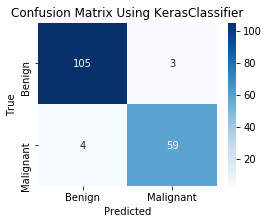

In [23]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Using KerasClassifier");

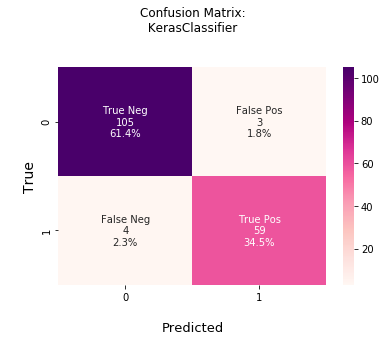

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


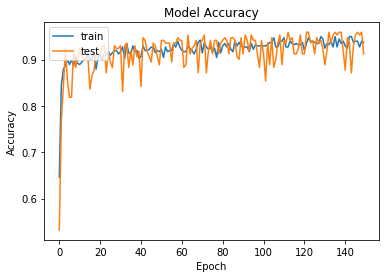

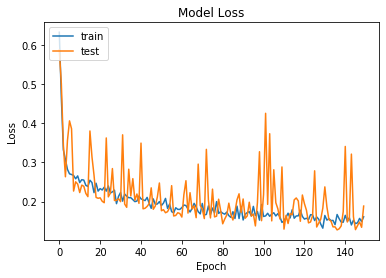

In [25]:
# Fit the model using best parameters
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'Model Accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )

plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'Model Loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
fpr_ST, tpr_ST, thresholds_ST = roc_curve(y_test, y_pred_ST)
auc_ST = auc(fpr_ST, tpr_ST)

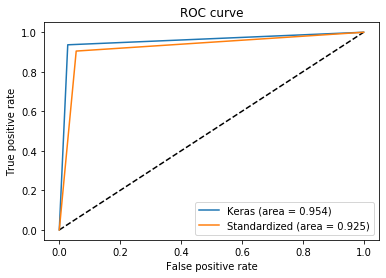

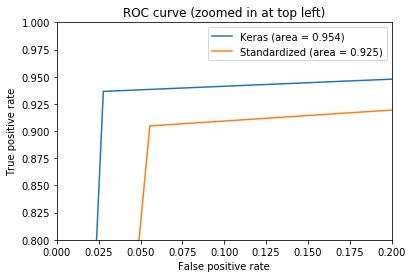

In [28]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_ST, tpr_ST, label='Standardized (area = {:.3f})'.format(auc_ST))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_ST, tpr_ST, label='Standardized (area = {:.3f})'.format(auc_ST))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## Credit Card

In [1]:
##############################################################################################
#                                   Import Libraries
##############################################################################################
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import binary_crossentropy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.optimizers import adam, rmsprop
from keras import initializers
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [2]:
# ===========================================================================
#                              [Load dataset]
# ===========================================================================
df = pd.read_excel(r"C:\Users\Ramatu's PC\Desktop\430pm\Creditcard.xlsx", skiprows = 1)

In [3]:
# ===========================================================================
#                              [DATA CLEANING]
# ===========================================================================
# drop the ID column
df.drop(['ID'], axis=1, inplace = True)

#strip() takes out leading and trailing spaces
df.columns.str.strip()

#View the first five rows
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# ===========================================================================
#                              [Explore and Transform Dataset]
# ===========================================================================
print('Count of data type in dataset')
df.get_dtype_counts()


Count of data type in dataset


int64    24
dtype: int64

In [5]:
print('Shape of dataset')
df.shape

Shape of dataset


(30000, 24)

In [6]:
print('Check dataset for Null Values')
df.isnull().sum() / df.shape[0] 


Check dataset for Null Values


LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

In [7]:
print('Get Dataset information')
df.info()
  

Get Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64


In [8]:
print('Get the values count of the binary column')
df["default payment next month"].value_counts() # 1 is default

Get the values count of the binary column


0    23364
1     6636
Name: default payment next month, dtype: int64

In [9]:
# Rename sex and limit_bal columns
df.rename(columns={"SEX":"GENDER", "LIMIT_BAL":"CREDIT LIMIT(NT$)", 'default payment next month': 'Default'}, inplace=True)

In [10]:
# Custom function to decode my daaset, specifically pay_0 to pay_6 ----- See markdown cell for column header meaning

def decoder(value):
    if value > 0 :
        return 1
    else :
        return 0

In [11]:
#this cell applies my custom function to my dataset (pay_0 to Pay_6)
# then it creates a transformed column that tells you how many late payments the customer has made
late_payments = df.loc[:,   'PAY_0':'PAY_6'].applymap(decoder).sum(axis=1)
df.insert(11,'Late Payments' ,late_payments )
df.head()

,CREDIT LIMIT(NT$),GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
df['GENDER'].unique() # Unique values in the sex column

array([2, 1], dtype=int64)

In [13]:
df['EDUCATION'].unique() # Unique values in the sex column

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [14]:
# 4,6, and 0 all represents other. 
# Hence, replace all three (5,6,0) with 4
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])


In [15]:
df['MARRIAGE'].unique() # Unique values in the marriage column

array([1, 2, 3, 0], dtype=int64)

In [16]:
# 3 and 0 represent other. 
# Hence, replace 0 with 3 for other
df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

In [17]:
df['Default'].unique()

array([1, 0], dtype=int64)

In [18]:
print('Statistical description of Select columns in the dataframe')
# Applying the describe method to a subset of our dataframe
# list of columns to include 
sub_df = df[['CREDIT LIMIT(NT$)', 'AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
sub_df.describe()

Statistical description of Select columns in the dataframe


,CREDIT LIMIT(NT$),AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [19]:
# ===========================================================================
#                              [Predictive Analysis]
# ===========================================================================
# Seperate the y from the x columns
X = df.drop('Default',axis=1)
Y = df['Default']

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.25, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


Feature Selection

In [20]:
#Feature Selection ---------Method 1----------
#filter based method ----CHI SQUARED----------

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k = 15) # default is k=10 but i want top 16
chi_selector.fit(X_norm, Y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')


15 selected features


In [21]:
#Feature Selection -------------------Method 2--------------------
#wrapper based method ----Reccursive feature elimination----------

import warnings
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)
rfe_selector = RFE(estimator=LogisticRegression(solver='lbfgs'), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X_norm, Y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 24 features.
15 selected features


In [22]:
#Feature Selection -------------------Method 3--------------------
#embedded method --------------lasso :selectFromModel-------------
import warnings
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(estimator = LogisticRegression(penalty="l2",solver='lbfgs'), max_features=18)
embeded_lr_selector.fit(X_norm, Y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

9 selected features


In [23]:
# put all selection together
feature_selection_ = pd.DataFrame({'Feature':X.columns,'Chi-2':chi_support,'RFE':rfe_support,  'Logistics':embeded_lr_support})
# count the selected times for each feature
feature_selection_['Total'] = np.sum(feature_selection_, axis=1)
# display all 30
feature_selection_ = feature_selection_.sort_values(['Total','Feature'] , ascending=False)
feature_selection_.index = range(1, len(feature_selection_)+1)
feature_selection_

,Feature,Chi-2,RFE,Logistics,Total
1,PAY_AMT6,True,True,True,3
2,PAY_AMT4,True,True,True,3
3,PAY_AMT3,True,True,True,3
4,PAY_AMT1,True,True,True,3
5,PAY_0,True,True,True,3
6,Late Payments,True,True,True,3
7,CREDIT LIMIT(NT$),True,True,True,3
8,PAY_AMT5,True,True,False,2
9,PAY_AMT2,False,True,True,2
10,PAY_6,True,True,False,2


In [24]:
df_FI = df[['PAY_0', 'AGE', 'BILL_AMT1', 'CREDIT LIMIT(NT$)', 'PAY_AMT6', 'PAY_AMT2', 
                 'PAY_AMT3', 'Late Payments', 'PAY_AMT5', 'BILL_AMT2', 'BILL_AMT6', 
                 'PAY_AMT1', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT4','EDUCATION','MARRIAGE', 'Default']]

In [25]:
# ===========================================================================
#                              [Predictive Analysis]
# ===========================================================================
class_weight = {1: 0.72, 0: 0.28}
# Seperate the y from the x columns
X_FI = df_FI.drop('Default',axis=1)
Y_FI = df_FI['Default']

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X_FI, Y_FI, test_size=0.25, random_state=1)
print('--------------- Split-out dataset [Done]')


--------------- Split-out dataset [Done]


# Baseline Model - Simple

In [26]:
df_FI.head()

,PAY_0,AGE,BILL_AMT1,CREDIT LIMIT(NT$),PAY_AMT6,PAY_AMT2,PAY_AMT3,Late Payments,PAY_AMT5,BILL_AMT2,BILL_AMT6,PAY_AMT1,BILL_AMT4,BILL_AMT3,BILL_AMT5,PAY_AMT4,EDUCATION,MARRIAGE,Default
0,2,24,3913,20000,0,689,0,2,0,3102,0,0,0,689,0,0,2,1,1
1,-1,26,2682,120000,2000,1000,1000,2,0,1725,3261,0,3272,2682,3455,1000,2,2,1
2,0,34,29239,90000,5000,1500,1000,0,1000,14027,15549,1518,14331,13559,14948,1000,2,2,0
3,0,37,46990,50000,1000,2019,1200,0,1069,48233,29547,2000,28314,49291,28959,1100,2,1,0
4,-1,57,8617,50000,679,36681,10000,0,689,5670,19131,2000,20940,35835,19146,9000,2,1,0


In [27]:
# baseline model

def create_baseline():
        # Create a Sequential model and add layers one at a time until the desired network topology is 
    #achieved
    model = Sequential()

    # Create the first layer. check that the input layer has the right number of dimension by using
    # input_dim argument and setting it to 18 for the 18 input variables
    model.add(Dense(18, input_dim = 18, kernel_initializer ='uniform', activation = 'relu'))
    # The first hidden layer has 18 neurons and expects 18 input variables
    # The initialization method is uniform --- The network weights is initialized to a small random
    #number generated from the uniform distribution --- Keras default (0 and 0.05)
    # The activation function for the first layer is relu

    # Create second Layer
    model.add(Dense(14, kernel_initializer ='uniform', activation = 'relu'))

    # Create third Layer
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Sigmoid activation function --- to ensure that the network output is between 0 and 1
    #the final layer predicts class --- Malignant, or Benign
    

    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# evaluate model with standardized dataset
estimator_B = KerasClassifier(build_fn=create_baseline, nb_epoch=150, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS = cross_val_score(estimator_B, X_Train, y_Train, cv=kfold)
results_VS = cross_val_score(estimator_B, X_Test, y_Test, cv=kfold)
print("Baseline Train set: %.2f%% (%.2f%%)" % (results_TS.mean()*100, results_TS.std()*100))
print("Baseline Test set: %.2f%% (%.2f%%)" % (results_VS.mean()*100, results_VS.std()*100))

Baseline Train set: 77.91% (0.03%)
Baseline Test set: 77.68% (0.14%)


In [28]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
estimator_B.fit(X_Train, y_Train, class_weight = class_weight)

y_pred_B = estimator_B.predict(X_Test)
scores = cross_val_score(estimator_B, X_Test, y_Test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_B, y_Test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_Test,y_pred_B))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_Test,y_pred_B))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_Test = y_Test.ravel() 
y_pred_B= y_pred_B.ravel() 

print('Misclassified examples: %d' % (y_Test != y_pred_B).sum())
print('Misclassification rate: %.3f' % ((y_Test != y_pred_B).sum()/y_pred_B.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(estimator_B.score(X_Test, y_Test)))
print("Training set Accuracy: {:.3f}".format(estimator_B.score(X_Train, y_Train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.777

KerasClassifier Confusion Matrix:

[[5831    1]
 [1668    0]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5832
           1       0.00      0.00      0.00      1668

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.78      0.68      7500

Mean ROC AUC: 0.626

Misclassified examples: 1669
Misclassification rate: 1669.000 %
Test set Accuracy: 0.777
Training set Accuracy: 0.779
--------------- KerasClassifier: classifier.fit [Done]


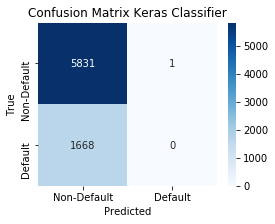

In [29]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_Test, y_pred_B)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

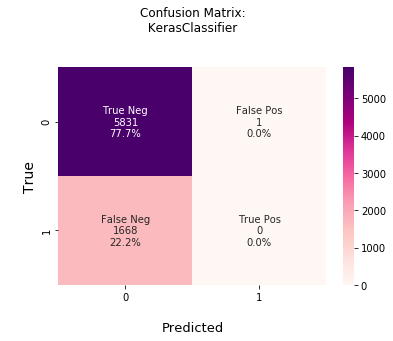

In [30]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

# Standadized Model

In [31]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators_ST = []
estimators_ST.append(( 'standardize' , StandardScaler()))
estimators_ST.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, nb_epoch=150,
batch_size=10, verbose=0)))
pipeline_ST = Pipeline(estimators_ST)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS2 = cross_val_score(pipeline_ST, X_Train, y_Train, cv=kfold)
results_VS2 = cross_val_score(pipeline_ST, X_Test, y_Test, cv=kfold)
print("Standardized Train set: %.2f%% (%.2f%%)" % (results_TS2.mean()*100, results_TS2.std()*100))
print("Standardized Test set: %.2f%% (%.2f%%)" % (results_VS2.mean()*100, results_TS2.std()*100))

Standardized Train set: 80.82% (0.54%)
Standardized Test set: 79.36% (0.54%)


In [32]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
pipeline_ST.fit(X_Train, y_Train, mlp__class_weight = class_weight)

y_pred_ST = pipeline_ST.predict(X_Test)
scores_ST = cross_val_score(pipeline_ST, X_Test, y_Test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_ST, y_Test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_Test,y_pred_ST))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_Test,y_pred_ST))
print('Mean ROC AUC: %.3f' % scores_ST.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_Test = y_Test.ravel() 
y_pred_ST= y_pred_ST.ravel() 

print('Misclassified examples: %d' % (y_Test != y_pred_ST).sum())
print('Misclassification rate: %.3f' % ((y_Test != y_pred_ST).sum()/y_pred_ST.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(pipeline_ST.score(X_Test, y_Test)))
print("Training set Accuracy: {:.3f}".format(pipeline_ST.score(X_Train, y_Train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.783

KerasClassifier Confusion Matrix:

[[4992  840]
 [ 791  877]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5832
           1       0.51      0.53      0.52      1668

    accuracy                           0.78      7500
   macro avg       0.69      0.69      0.69      7500
weighted avg       0.78      0.78      0.78      7500

Mean ROC AUC: 0.739

Misclassified examples: 1631
Misclassification rate: 0.950 %
Test set Accuracy: 0.783
Training set Accuracy: 0.785
--------------- KerasClassifier: classifier.fit [Done]


power of standardization

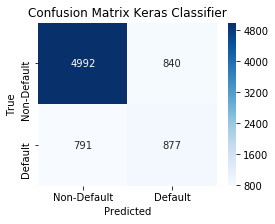

In [33]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_Test, y_pred_ST)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

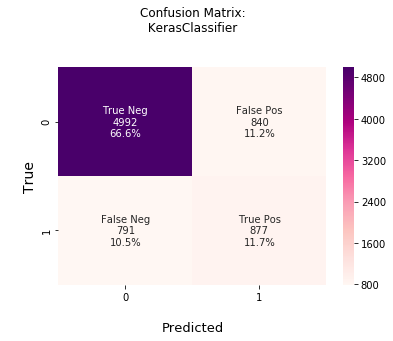

In [34]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

# Baseline Model With Learning Rate

In [35]:
# baseline
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dropout

def create_baseline_lr(optimizer= 'sgd' , kernel_initializer= 'glorot_uniform'):
    
    # Create a Sequential model and add layers one at a time until the desired network topology is 
    #achieved
    model = Sequential()

    # Create the first layer. check that the input layer has the right number of dimension by using
    # input_dim argument and setting it to 18 for the 18 input variables
    model.add(Dense(18, input_dim = 18, kernel_initializer ='uniform', activation = 'relu'))
    # The first hidden layer has 18 neurons and expects 18 input variables
    # The initialization method is uniform --- The network weights is initialized to a small random
    #number generated from the uniform distribution --- Keras default (0 and 0.05)
    # The activation function for the first layer is relu

    # Create second Layer
    model.add(Dense(14, kernel_initializer ='uniform', activation = 'relu'))

    # Create third Layer
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Sigmoid activation function --- to ensure that the network output is between 0 and 1
    #the final layer predicts class --- Malignant, or Benign
    
    # Compile model - learning rate 0.01
    sgd = SGD(lr=0.001, momentum=0.99, decay=0.01, nesterov=False)
    model.compile(loss= 'binary_crossentropy' , optimizer=optimizer, metrics=[ 'accuracy' ])
    return model

numpy.random.seed(seed)
estimators_LR = []
estimators_LR.append(( 'standardize' , StandardScaler()))
estimators_LR.append(( 'mlp_lr' , KerasClassifier(build_fn=create_baseline_lr, nb_epoch=150,
batch_size=10, verbose=0)))
pipeline_LR = Pipeline(estimators_LR)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS3 = cross_val_score(pipeline_LR, X_Train, y_Train, cv=kfold)
results_VS3 = cross_val_score(pipeline_LR, X_Test, y_Test, cv=kfold)
print("Baseline Training set: %.2f%% (%.2f%%)" % (results_TS3.mean()*100, results_TS3.std()*100))
print("Baseline Test set: %.2f%% (%.2f%%)" % (results_VS3.mean()*100, results_VS3.std()*100))

Baseline Training set: 77.92% (0.02%)
Baseline Test set: 77.76% (0.05%)


In [36]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
pipeline_LR.fit(X_Train, y_Train, mlp_lr__class_weight = class_weight)

y_pred_LR = pipeline_LR.predict(X_Test)
scores_LR = cross_val_score(pipeline_LR, X_Test, y_Test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_LR, y_Test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_Test,y_pred_LR))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_Test,y_pred_LR,zero_division=1))
print('Mean ROC AUC: %.3f' % scores_LR.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_Test = y_Test.ravel() 
y_pred_LR= y_pred_LR.ravel() 

print('Misclassified examples: %d' % (y_Test != y_pred_LR).sum())
print('Misclassification rate: %.3f' % ((y_Test != y_pred_LR).sum()/y_pred_LR.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(pipeline_LR.score(X_Test, y_Test)))
print("Training set Accuracy: {:.3f}".format(pipeline_LR.score(X_Train, y_Train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.778

KerasClassifier Confusion Matrix:

[[5832    0]
 [1668    0]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5832
           1       1.00      0.00      0.00      1668

    accuracy                           0.78      7500
   macro avg       0.89      0.50      0.44      7500
weighted avg       0.83      0.78      0.68      7500

Mean ROC AUC: 0.584

Misclassified examples: 1668
Misclassification rate: inf %


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Test set Accuracy: 0.778
Training set Accuracy: 0.779
--------------- KerasClassifier: classifier.fit [Done]


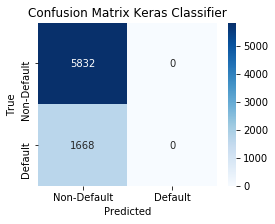

In [37]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_Test, y_pred_LR)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

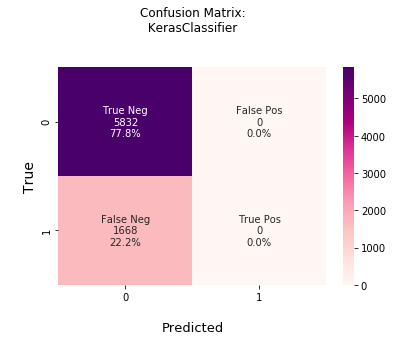

In [38]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

# Dropout Regularization
dropout in the visible and hidden layers with weight constraint

In [39]:
# dropout in the visible and hidden layers with weight constraint
def create_model_dr(optimizer= 'sgd' , kernel_initializer= 'glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(18,)))
    model.add(Dense(18, kernel_initializer ='uniform', activation = 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(14, kernel_initializer ='uniform', activation = 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.99, decay=0.01, nesterov=False)
    model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])
    return model
numpy.random.seed(seed)
estimators_DR = []
estimators_DR.append(( 'standardize' , StandardScaler()))
estimators_DR.append(( 'mlp_dr' , KerasClassifier(build_fn=create_model_dr, nb_epoch=150,batch_size=10, verbose=0)))
pipeline_DR = Pipeline(estimators_DR)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

results_TS4 = cross_val_score(pipeline_DR, X_Train, y_Train, cv=kfold)
results_VS4 = cross_val_score(pipeline_DR, X_Test, y_Test, cv=kfold)
print("Visible plus Hidden layers (Training set): %.2f%% (%.2f%%)" % (results_TS4.mean()*100, results_TS4.std()*100))
print("Visible plus Hidden layers (Test set): %.2f%% (%.2f%%)" % (results_VS4.mean()*100, results_VS4.std()*100))

Visible plus Hidden layers (Training set): 79.46% (1.17%)
Visible plus Hidden layers (Test set): 77.84% (0.24%)


In [40]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
pipeline_DR.fit(X_Train, y_Train, mlp_dr__class_weight = class_weight)

y_pred_DR = pipeline_DR.predict(X_Test)
scores_DR = cross_val_score(pipeline_DR, X_Test, y_Test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_DR, y_Test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_Test,y_pred_DR))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_Test,y_pred_DR))
print('Mean ROC AUC: %.3f' % scores_DR.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_Test = y_Test.ravel() 
y_pred_DR= y_pred_DR.ravel() 

print('Misclassified examples: %d' % (y_Test != y_pred_DR).sum())
print('Misclassification rate: %.3f' % ((y_Test != y_pred_DR).sum()/y_pred_DR.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(pipeline_DR.score(X_Test, y_Test)))
print("Training set Accuracy: {:.3f}".format(pipeline_DR.score(X_Train, y_Train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.803

KerasClassifier Confusion Matrix:

[[5226  606]
 [ 874  794]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5832
           1       0.57      0.48      0.52      1668

    accuracy                           0.80      7500
   macro avg       0.71      0.69      0.70      7500
weighted avg       0.79      0.80      0.80      7500

Mean ROC AUC: 0.644

Misclassified examples: 1480
Misclassification rate: 1.057 %
Test set Accuracy: 0.803
Training set Accuracy: 0.803
--------------- KerasClassifier: classifier.fit [Done]


dropout regulization works better with more feature......only have 18-----perharps consider original dataset with no feature selection.....

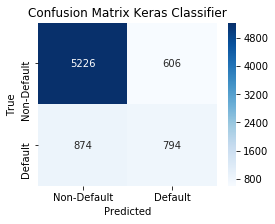

In [41]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_Test, y_pred_DR)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

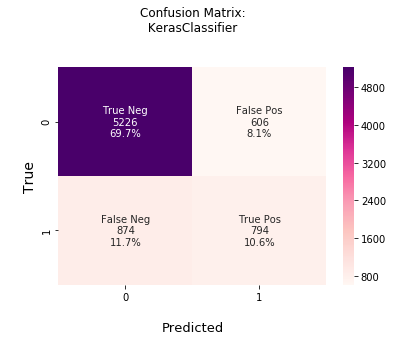

In [42]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

# Dropout Regularization ---Full dataset no Feature Selection

In [43]:
# dropout in the visible and hidden layers with weight constraint
def create_model_dr_f(optimizer= 'sgd' , kernel_initializer= 'glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(24,)))
    model.add(Dense(24, kernel_initializer ='uniform', activation = 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(18, kernel_initializer ='uniform', activation = 'relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.99, decay=0.01, nesterov=False)
    model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])
    return model
numpy.random.seed(seed)
estimators_DRF = []
estimators_DRF.append(( 'standardize' , StandardScaler()))
estimators_DRF.append(( 'mlp_dr_f' , KerasClassifier(build_fn=create_model_dr_f, nb_epoch=150,batch_size=10, verbose=0)))
pipeline_DRF = Pipeline(estimators_DRF)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

results_TS5 = cross_val_score(pipeline_DRF, X_train, y_train, cv=kfold)
results_VS5 = cross_val_score(pipeline_DRF, X_validation, y_validation, cv=kfold)
print("Visible plus Hidden layers (Training set): %.2f%% (%.2f%%)" % (results_TS5.mean()*100, results_TS4.std()*100))
print("Visible plus Hidden layers (Test set): %.2f%% (%.2f%%)" % (results_VS5.mean()*100, results_VS4.std()*100))

Visible plus Hidden layers (Training set): 80.78% (1.17%)
Visible plus Hidden layers (Test set): 78.64% (0.24%)


In [44]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
pipeline_DRF.fit(X_train, y_train, mlp_dr_f__class_weight = class_weight)

y_pred_DRF = pipeline_DRF.predict(X_validation)
scores_DRF = cross_val_score(pipeline_DRF, X_validation, y_validation, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_DRF, y_validation)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_validation,y_pred_DRF))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_validation,y_pred_DRF))
print('Mean ROC AUC: %.3f' % scores_DRF.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_Test = y_Test.ravel() 
y_pred_DRF= y_pred_DRF.ravel() 

print('Misclassified examples: %d' % (y_validation != y_pred_DRF).sum())
print('Misclassification rate: %.3f' % ((y_validation != y_pred_DRF).sum()/y_pred_DRF.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(pipeline_DRF.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(pipeline_DRF.score(X_train, y_train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.807

KerasClassifier Confusion Matrix:

[[5302  530]
 [ 917  751]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5832
           1       0.59      0.45      0.51      1668

    accuracy                           0.81      7500
   macro avg       0.72      0.68      0.69      7500
weighted avg       0.79      0.81      0.80      7500

Mean ROC AUC: 0.708

Misclassified examples: 1447
Misclassification rate: 1.130 %
Test set Accuracy: 0.807
Training set Accuracy: 0.808
--------------- KerasClassifier: classifier.fit [Done]


dropout regulization works better with more feature......only have 18-----perharps consider original dataset with no feature selection.....

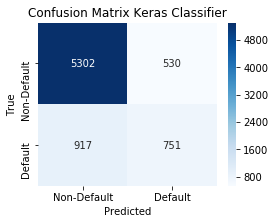

In [45]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_DRF)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

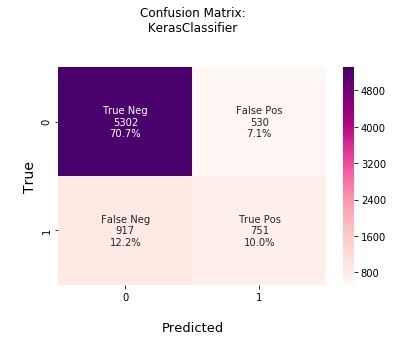

In [46]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_Test, y_pred_B)
auc_keras = auc(fpr_keras, tpr_keras)
fpr_ST, tpr_ST, thresholds_ST = roc_curve(y_Test, y_pred_ST)
auc_ST = auc(fpr_ST, tpr_ST)
fpr_DR, tpr_DR, thresholds_DR = roc_curve(y_Test, y_pred_DR)
auc_DR = auc(fpr_DR, tpr_DR)
fpr_DRF, tpr_DRF, thresholds_DRF = roc_curve(y_Test, y_pred_DRF)
auc_DRF = auc(fpr_DRF, tpr_DRF)

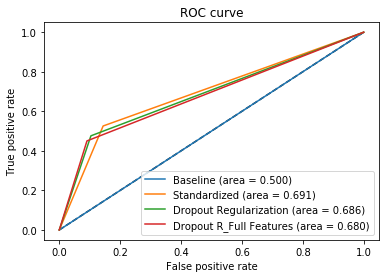

In [50]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Baseline (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_ST, tpr_ST, label='Standardized (area = {:.3f})'.format(auc_ST))
plt.plot(fpr_DR, tpr_DR, label='Dropout Regularization (area = {:.3f})'.format(auc_DR))
plt.plot(fpr_DRF, tpr_DRF, label='Dropout R_Full Features (area = {:.3f})'.format(auc_DRF))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Values are different from the ones calculated in classification report --- Those ones are the mean cv scores

## Wheat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import numpy
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [2]:
# ===========================================================================
#                              [Load dataset]
# ===========================================================================
df = pd.read_csv(r"C:\Users\Ramatu's PC\Desktop\430pm\wheat.csv")

In [3]:
# ===========================================================================
#                              [DATA CLEANING]
# ===========================================================================

#strip() takes out leading and trailing spaces
df.columns.str.strip()

#View the first five rows
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel groove length,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# ===========================================================================
#                              [Explore Dataset]
# ===========================================================================
print('Count of data type in dataset')
df.get_dtype_counts()


Count of data type in dataset


float64    7
int64      1
dtype: int64

In [5]:
print('Shape of dataset')
df.shape

Shape of dataset


(210, 8)

In [6]:
print('Check dataset for Null Values')
df.isnull().sum() / df.shape[0] 


Check dataset for Null Values


Area                     0.0
Perimeter                0.0
Compactness              0.0
Kernel Length            0.0
Kernel Width             0.0
Asymmetry coefficient    0.0
Kernel groove length     0.0
Variety                  0.0
dtype: float64

In [7]:
print('Get Dataset information')
df.info()
  

Get Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
Area                     210 non-null float64
Perimeter                210 non-null float64
Compactness              210 non-null float64
Kernel Length            210 non-null float64
Kernel Width             210 non-null float64
Asymmetry coefficient    210 non-null float64
Kernel groove length     210 non-null float64
Variety                  210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [8]:
print('Statistical description of the columns in the dataframe')
df.describe()

Statistical description of the columns in the dataframe


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel groove length,Variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
print('Get the values count of the binary column')
df["Variety"].value_counts()

Get the values count of the binary column


3    70
2    70
1    70
Name: Variety, dtype: int64

In [10]:
# ===========================================================================
#                              [Predictive Analysis]
# ===========================================================================
# Seperate the y from the x columns
X = df.drop('Variety',axis=1)
Y = df['Variety']

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)
Y = label_binarize(Y, classes=[0, 1, 2])

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


In [11]:
# define baseline model
def multiclass_model():
    
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=7, kernel_initializer= "normal" , activation= "relu" ))
    model.add(Dense(8,  activation='relu'))
    model.add(Dense(5, activation= "relu" ))
    model.add(Dense(3, activation= 'softmax' ))
    # Compile model
    model.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "accuracy" ])
    return model

In [12]:
estimator = KerasClassifier(build_fn=multiclass_model, epochs=300, batch_size=20, verbose=0)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)



results_TS = cross_val_score(estimator, X_train, y_train, cv=5)
results_VS = cross_val_score(estimator, X_validation, y_validation, cv=5)

print("(Training set): %.2f%% (%.2f%%)" % (results_TS.mean()*100, results_TS.std()*100))
print("(Test set): %.2f%% (%.2f%%)" % (results_VS.mean()*100, results_VS.std()*100))



(Training set): 88.34% (6.46%)
(Test set): 56.67% (31.32%)


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


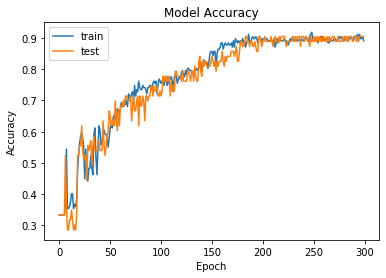

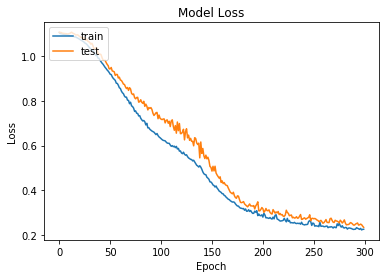

In [13]:
# Fit the model using best parameters
history = estimator.fit(X_train, y_train, validation_data=(X_validation,y_validation))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'Model Accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )

plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'Model Loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()